In [107]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import csv
import datetime
from bs4 import BeautifulSoup
now = datetime.datetime.now()
%matplotlib inline

In [ ]:
#scrape elements
COLUMNS = ['Rank', 'Player', 'MMR', 'Games']
dataframes = []
i = 1
url = "https://r6.tracker.network/leaderboards/pvp-season/pc/Mmr?page={}&region=-1&season=12"
#The original file size 1725
while(i<3000):
    try:
        response = requests.get(url.format(i))
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find("table") # Find the "table" tag in the page
        rows = table.find_all("tr") # Find all the "tr" tags in the table
        cy_data = []
        for row in rows:
            cells = row.find_all("td") #  Find all the "td" tags in each row
            cells = cells[0:4] # Select the correct columns
            cy_data.append([cell.text for cell in cells]) # For each "td" tag, get the text inside it

        dataframes.append(pd.DataFrame(cy_data, columns=COLUMNS).drop(0, axis=0))
        i= i+1
        print(i)
    except:
        break
final = pd.concat(dataframes)
print("finished")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228


## This is where we clean the dataset and make the x the numerical values for the graph

In [81]:
final2 = final.copy()
final2["MMR"] = final2["MMR"].str.replace(',','')
final2["Player"] = final2["Player"].str.replace('\n','')
datetime = now.strftime("%Y-%m-%d %H:%M")
final2["Date"] = datetime
x = final2["MMR"]
x = x.values
x = x.astype(np.double)

## This is if you want to use matplotlib for a histogram

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([   0, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
        2400, 2500, 2700, 2900, 3100, 3300, 3700, 4100, 4500]),
 <a list of 19 Patch objects>)

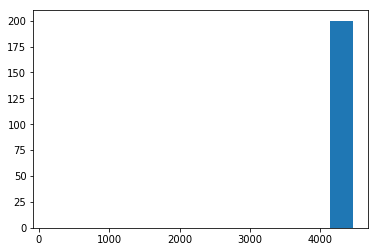

In [82]:
bins = [0,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2700,2900,3100,3300,3700,4100,4500]
plt.hist(np.clip(x, 0, 4500), bins = bins, rwidth = 0.8)

## Saves to a CSV

In [106]:
date = now.strftime('%m-%d-%Y')
path = '/Users/Kyle_Staples/Documents/GitHub/IS834/DataScrape/{}_out.csv'
final2.to_csv(path.format(date) , sep=',', encoding='utf-8')

In [98]:
#get Duplicates
#final2.loc[final2.Player == final2.Player].sort_values('Player')